#Import necessary modules and packages

In [ ]:
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
print(tf.__version__)
try:
  import ktrain
except:
  !pip install ktrain
  os.kill(os.getpid(), 9)
from ktrain import text
from ktrain.text import texts_from_df
import time
import pandas as pd
from keras.preprocessing.text import Tokenizer
import pickle
import json
import glob
import json
import numpy as np

2.8.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load data - Save only 'headline' and 'short_description'

In [ ]:
reviews = pd.read_json('drive/MyDrive/Colab Notebooks/news_category_trainingdata_final.json')

In [ ]:
reviews['combined_text'] = reviews['headline'] + ' ' + reviews['short_description']

#Sort category by 'health and living'

In [ ]:
reviews[reviews['category'].str.contains("HEALTHY LIVING")]

,category,headline,authors,link,short_description,date,combined_text
7578,HEALTHY LIVING,To The People Who Say ‘I’m Tired’ When Someone...,"The Mighty, ContributorWe face disability, dis...",https://www.huffingtonpost.com/entry/to-the-pe...,"When you feel like this, it’s important to kno...",2018-01-16,To The People Who Say ‘I’m Tired’ When Someone...
7693,HEALTHY LIVING,Eating Shake Shack Made Me Feel Healthier Than...,"Colleen Werner, ContributorCampus Editor-at-Large",https://www.huffingtonpost.com/entry/eating-sh...,I can vividly remember the first time I felt f...,2018-01-12,Eating Shake Shack Made Me Feel Healthier Than...
7747,HEALTHY LIVING,How To Stay Updated On The News Without Losing...,Lindsay Holmes,https://www.huffingtonpost.com/entry/anxiety-f...,Because it's only becoming more of a struggle.,2018-01-12,How To Stay Updated On The News Without Losing...
7927,HEALTHY LIVING,27 Perfect Tweets About Whole30 That Will Make...,Lindsay Holmes,https://www.huffingtonpost.com/entry/tweets-ab...,"""The only Whole30 I want to participate in is ...",2018-01-10,27 Perfect Tweets About Whole30 That Will Make...
7934,HEALTHY LIVING,The Real Reason Your Hands Are Always Cold,"Refinery29, ContributorThe #1 new-media brand ...",https://www.huffingtonpost.com/entry/the-real-...,"Essentially, your hands are kept warm thanks t...",2018-01-10,The Real Reason Your Hands Are Always Cold Ess...
...,...,...,...,...,...,...,...
124913,HEALTHY LIVING,Why You Need Both a 'Bouncer' and a 'Bartender...,"Elizabeth Grace Saunders, ContributorFounder, ...",https://www.huffingtonpost.com/entry/happy-hea...,Instead of judging whether you made the right ...,2014-04-18,Why You Need Both a 'Bouncer' and a 'Bartender...
124914,HEALTHY LIVING,How Video Games Can Improve Dialogue on Mental...,"Mona Shattell, Contributornurse researcher",https://www.huffingtonpost.com/entry/mental-il...,While there are strong arguments for the games...,2014-04-18,How Video Games Can Improve Dialogue on Mental...
124925,HEALTHY LIVING,Wake-Up Calls Inspired My Change From Overdriv...,"Jane Shure, ContributorLeadership Coach, Psych...",https://www.huffingtonpost.com/entry/wake-up-c...,My wake-up call marching orders were clear: No...,2014-04-18,Wake-Up Calls Inspired My Change From Overdriv...
124950,HEALTHY LIVING,Loving a Narcissist Without Losing Yourself,"Nancy Colier, ContributorPsychotherapist, inte...",https://www.huffingtonpost.com/entry/narcissis...,It is very difficult for some people to see an...,2014-04-18,Loving a Narcissist Without Losing Yourself It...


#Assign boolean values as integer to 'healthy living'.

In [ ]:
reviews['healthy'] = np.where((reviews['category'] == 'HEALTHY LIVING'), 1, 0)

In [ ]:
reviews['healthy'].describe()

count    200853.000000
mean          0.033328
std           0.179492
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: healthy, dtype: float64

#Balance data to avoid overtuning in ML algorithm.

In [ ]:
sample_amount = 6694
healthy = reviews[reviews['healthy'] == 1]
not_healthy = reviews[reviews['healthy'] == 0].sample(n=sample_amount)

In [ ]:
review_sample = pd.concat([healthy,not_healthy])

In [ ]:
review_sample.describe()

,healthy
count,13388.000000
mean,0.500000
std,0.500019
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


#Train model and tune parameters.

In [ ]:
target_names = ['OTHERS','HEALTHY LIVING']

In [ ]:
t = text.Transformer('distilbert-base-uncased', maxlen=512, class_names=target_names)

In [ ]:
train, val, preprocess = texts_from_df(review_sample, 'combined_text', label_columns=['healthy'], val_df=None, max_features=20000, maxlen=512, val_pct=0.1, ngram_range=1, preprocess_mode='distilbert', verbose=1)

['not_healthy', 'healthy']
        not_healthy  healthy
95143           0.0      1.0
30290           1.0      0.0
122121          1.0      0.0
163717          1.0      0.0
156128          1.0      0.0
['not_healthy', 'healthy']
        not_healthy  healthy
119650          0.0      1.0
92854           0.0      1.0
180845          1.0      0.0
108903          0.0      1.0
93723           1.0      0.0
preprocessing train...
language: en
train sequence lengths:
	mean : 29
	95percentile : 58
	99percentile : 70


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 28
	95percentile : 58
	99percentile : 72


In [ ]:
model = preprocess.get_classifier()
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=16)

In [ ]:
learner.lr_find(max_epochs=6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/6
753/753 [==============================] - 675s 883ms/step - loss: 0.6525 - accuracy: 0.6348
Epoch 2/6
753/753 [==============================] - 671s 892ms/step - loss: 0.3759 - accuracy: 0.8440
Epoch 3/6
753/753 [==============================] - 671s 892ms/step - loss: 0.4506 - accuracy: 0.7720
Epoch 4/6
753/753 [==============================] - 669s 888ms/step - loss: 0.6963 - accuracy: 0.4941
Epoch 5/6
753/753 [==============================] - 152s 200ms/step - loss: 25.3974 - accuracy: 0.5057


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


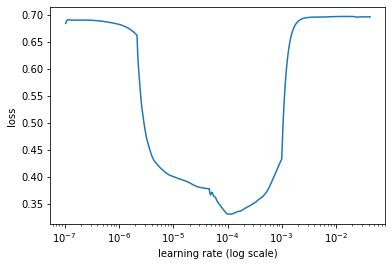

In [ ]:
learner.lr_plot()

In [ ]:
history=learner.autofit(1e-4,checkpoint_folder='checkpoint',epochs=12, early_stopping=True)



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/12
754/754 [==============================] - 687s 899ms/step - loss: 0.3817 - accuracy: 0.8373 - val_loss: 0.3101 - val_accuracy: 0.8730
Epoch 2/12
754/754 [==============================] - 679s 897ms/step - loss: 0.2377 - accuracy: 0.9098 - val_loss: 0.3085 - val_accuracy: 0.8790
Epoch 3/12
754/754 [==============================] - 678s 897ms/step - loss: 0.1545 - accuracy: 0.9460 - val_loss: 0.3464 - val_accuracy: 0.8693
Epoch 3: early stopping
Weights from best epoch have been loaded into model.


In [ ]:
learner.save_model("drive/MyDrive/distilbertmodel_learner")

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=preprocess)
predictor.save("drive/MyDrive/distilbertmodel_predictor")

In [ ]:
validation = learner.validate(val_data=val, print_report=True)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       664
           1       0.86      0.91      0.88       675

    accuracy                           0.88      1339
   macro avg       0.88      0.88      0.88      1339
weighted avg       0.88      0.88      0.88      1339

